In [9]:
!pip install efficient_apriori

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('/kaggle/input/processed-movie2/processed-movie.csv')

In [12]:
from efficient_apriori import apriori

df['star'] = 'star_' + df['star'].astype(str)
df['director'] = 'dir_' + df['director'].astype(str)


cols_for_apriori = [
    'genre',
    'performance_class',
    'score_cat',
    'budget_cat',
    'director_category',
    'actor_category',
    'company',
    'star',
    'director'
]



transactions = df[cols_for_apriori].astype(str).values.tolist()


itemsets, rules = apriori(transactions, min_support=0.005, min_confidence=0.4)
for rule in sorted(rules, key=lambda x: x.lift, reverse=True)[:10]:
    print(f"{rule}: lift={rule.lift:.2f}")

{High-Performer-Director, Low Budget} -> {All-Time Blockbuster, Mid-Actor} (conf: 0.488, supp: 0.013, lift: 16.385, conv: 1.893): lift=16.38
{All-Time Blockbuster, Mid-Actor} -> {High-Performer-Director, Low Budget} (conf: 0.430, supp: 0.013, lift: 16.385, conv: 1.708): lift=16.38
{High-Performer-Director, Low Budget, Mid-Actor} -> {All-Time Blockbuster} (conf: 0.933, supp: 0.013, lift: 14.245, conv: 14.017): lift=14.25
{Low Budget, Mid-Actor} -> {All-Time Blockbuster, High-Performer-Director} (conf: 0.576, supp: 0.013, lift: 14.202, conv: 2.265): lift=14.20
{Good, Low Budget, Mid-Actor} -> {All-Time Blockbuster} (conf: 0.783, supp: 0.006, lift: 11.956, conv: 4.313): lift=11.96
{Low Budget, Mid-Actor} -> {All-Time Blockbuster} (conf: 0.771, supp: 0.017, lift: 11.761, conv: 4.073): lift=11.76
{Good, High-Performer-Director, Low Budget} -> {All-Time Blockbuster} (conf: 0.712, supp: 0.007, lift: 10.872, conv: 3.248): lift=10.87
{Comedy, High-Performer-Director, Low Budget} -> {All-Time Bl

In [13]:
rules_df = pd.DataFrame([{
    "lhs": ', '.join(list(rule.lhs)),
    "rhs": ', '.join(list(rule.rhs)),
    "support": rule.support,
    "confidence": rule.confidence,
    "lift": rule.lift
} for rule in rules])

rules_df

,lhs,rhs,support,confidence,lift
0,Action,Good,0.094101,0.423122,1.031486
1,High Budget,Action,0.079353,0.486011,2.185339
2,Action,Mid Budget,0.133908,0.602113,0.796785
3,Adventure,Flop,0.024798,0.444965,0.945196
4,Adventure,Low-Actor,0.028191,0.505855,1.079627
...,...,...,...,...,...
3350,"Drama, Flop, Low-Director, Very Good","Low-Actor, Mid Budget",0.020230,0.782828,1.971739
3351,"Drama, Flop, Low-Actor, Very Good","Low-Director, Mid Budget",0.020230,0.752427,2.037137
3352,"Drama, Low-Director, Very Good","Flop, Low-Actor, Mid Budget",0.020230,0.620000,2.237607
3353,"Drama, Low-Actor, Very Good","Flop, Low-Director, Mid Budget",0.020230,0.547703,1.991695


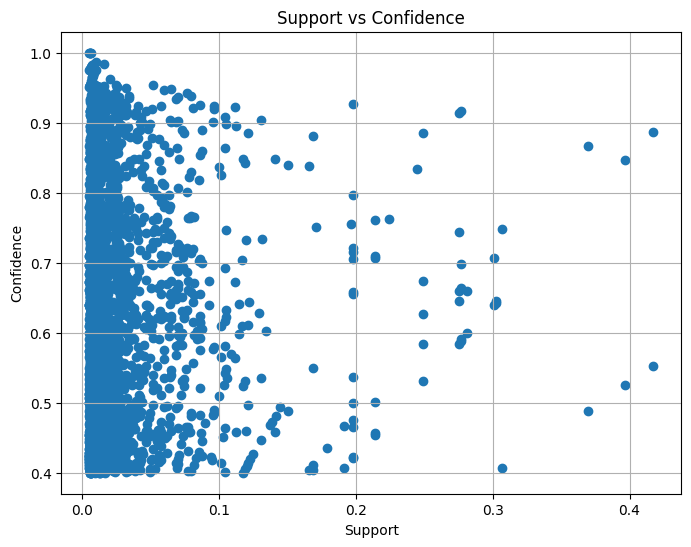

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(rules_df['support'], rules_df['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()


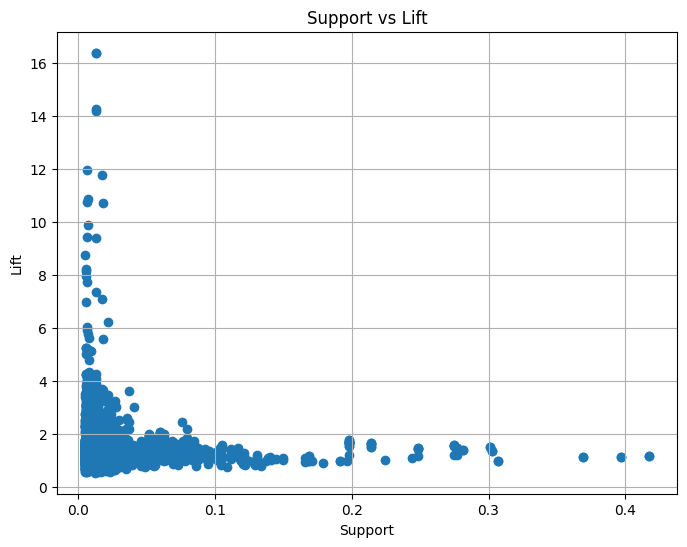

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(rules_df['support'], rules_df['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.grid(True)
plt.show()

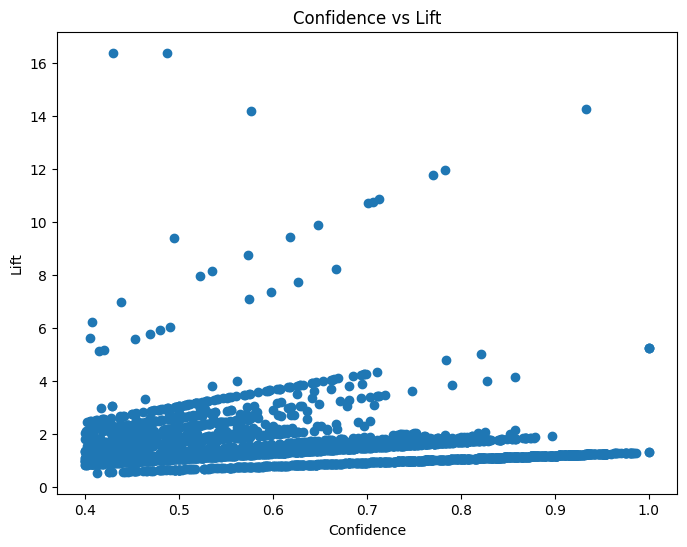

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(rules_df['confidence'], rules_df['lift'])
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift')
plt.show()


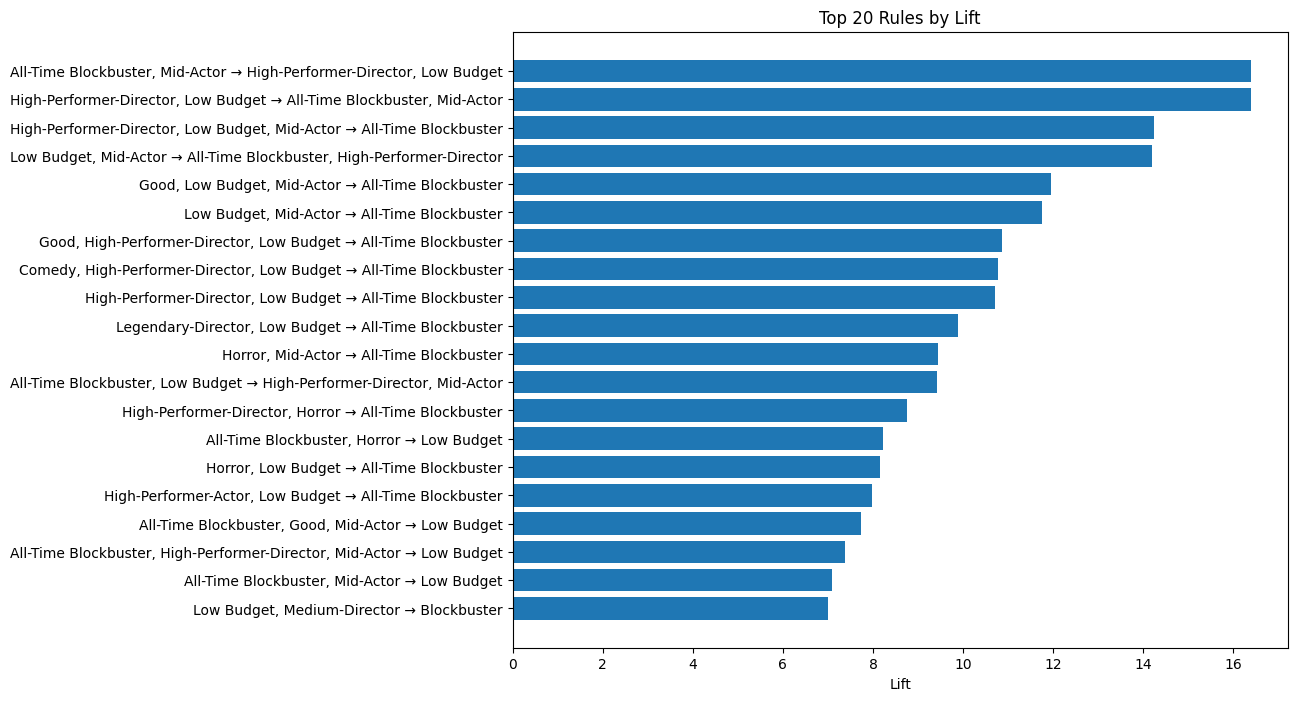

In [17]:
top20 = rules_df.sort_values('lift', ascending=False).head(20)

plt.figure(figsize=(10,8))
plt.barh(top20['lhs'] + " → " + top20['rhs'], top20['lift'])
plt.xlabel('Lift')
plt.title('Top 20 Rules by Lift')
plt.gca().invert_yaxis()
plt.show()